In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.io import loadmat
import pickle
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import norm

In [4]:
distribution2 = 'male_train_age_labels_small.npy'
ages2 = 'male_train_age_small.npy'
bins2 = 'bin_centers.npy'

distribution1 = '../../../../agemapper/datasets copy/male_train_age_labels_small.npy'
ages1 = '../../../../agemapper/datasets copy/male_train_age_small.npy'
bins1 = '../../../../agemapper/datasets copy/bin_centers.npy'

In [5]:
ages1 = np.load(ages1)
ages2 = np.load(ages2)
distribution1 = np.load(distribution1)
distribution2 = np.load(distribution2)
bins1 = np.load(bins1)
bins2 = np.load(bins2)

In [7]:
print(np.where(ages1 == ages1.min()))
print(np.where(ages2 == ages2.min()))

(array([2745]),)
(array([2745]),)


73.31289954337899


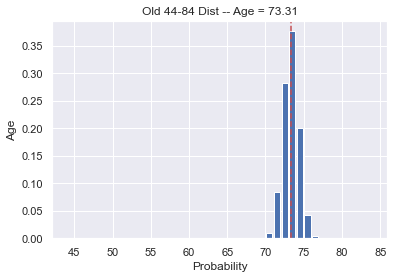

---
73.31289954337899


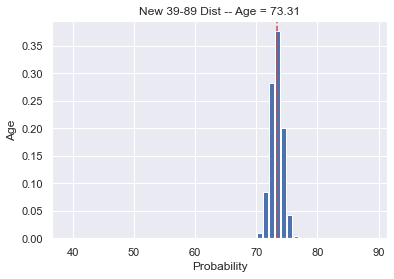

In [40]:
print(ages1[2745])
plt.bar(bins1, distribution1[2745])
plt.axvline(x=ages1[2745], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 44-84 Dist -- Age = {:.2f}'.format(ages1[2745]))
plt.ylabel('Age')
plt.xlabel('Probability')
plt.show()
print('---')
print(ages2[2745])
plt.bar(bins2, distribution2[2745])
plt.axvline(x=ages2[2745], ymin=0, ymax=1, c='r', ls='--')
plt.title('New 39-89 Dist -- Age = {:.2f}'.format(ages2[2745]))
plt.ylabel('Age')
plt.xlabel('Probability')
plt.show()

In [11]:
print((ages1==ages2).all())

True


In [22]:
arr1inds = ages1.argsort()
ages1 = ages1[arr1inds]
ages2 = ages2[arr1inds]
distribution1 = distribution1[arr1inds]
distribution2 = distribution2[arr1inds]

In [26]:
ages1[np.where(ages1<=46)]

array([45.12545662, 45.61974886])

In [27]:
distribution1[:2]

array([[3.19883238e-01, 3.59007764e-01, 1.60483419e-01, 2.84047235e-02,
        1.96964852e-03, 5.28671049e-05, 5.43182046e-07, 2.11694284e-09,
        3.10773629e-12, 1.66533454e-15, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.15068454e-01, 3.80408928e-01, 2.68124834e-01, 7.51042451e-02,
        8.28832311e-03, 3.56170989e-04, 5.88993926e-06, 3.71025999e-08,
        8.83199069e-11, 7.90478794e-14, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [28]:
distribution1[np.where(ages1<=46)]

array([[3.19883238e-01, 3.59007764e-01, 1.60483419e-01, 2.84047235e-02,
        1.96964852e-03, 5.28671049e-05, 5.43182046e-07, 2.11694284e-09,
        3.10773629e-12, 1.66533454e-15, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.15068454e-01, 3.80408928e-01, 2.68124834e-01, 7.51042451e-02,
        8.28832311e-03, 3.56170989e-04, 5.88993926e-06, 3.71025999e-08,
        8.83199069e-11, 7.90478794e-14, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

# Things To Look At:
- Distributions of certain subjects at the edges
- Distributions of subjects in the area of the peak (several subjects, maybe overlayed)
- Average Distributions Across Bin Ranges (every 5 years?) 
- Distributions of Several Subjects in each bin


## Distributions of certain subjects at the edges

In [30]:
print("Min Age:", ages1.min())
print("Max Age:", ages1.max())

Min Age: 45.12545662100456
Max Age: 81.63961187214613


In [31]:
ages1[:5]

array([45.12545662, 45.61974886, 46.11358447, 46.11792237, 46.33230594])

In [34]:
ages1[-5:]

array([79.74052511, 80.12522831, 80.3619863 , 80.91609589, 81.63961187])

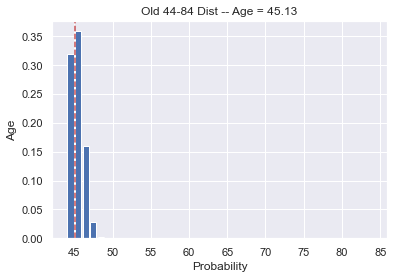

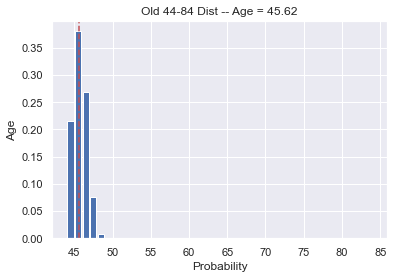

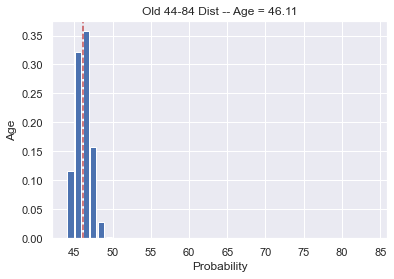

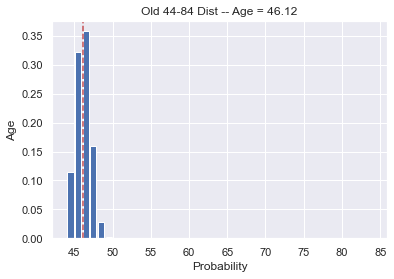

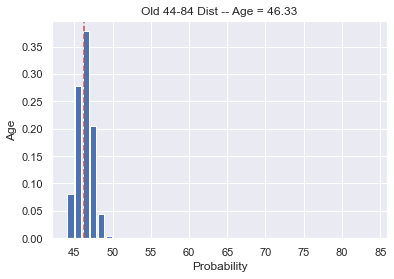

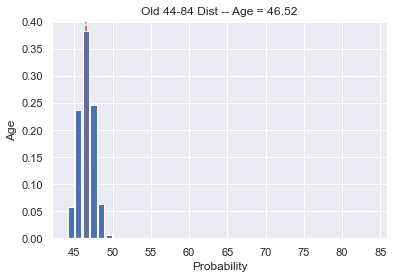

---


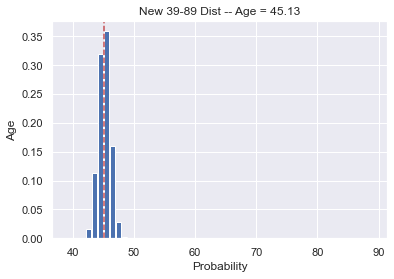

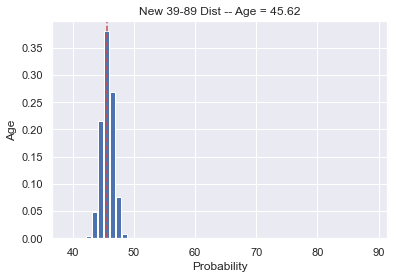

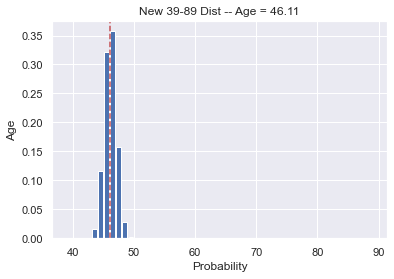

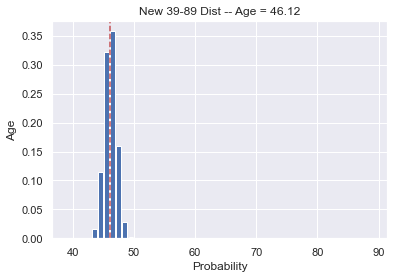

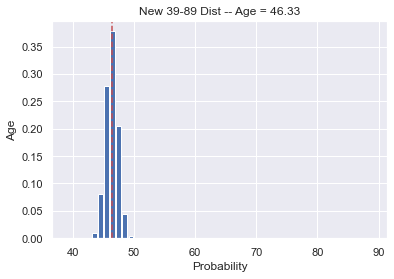

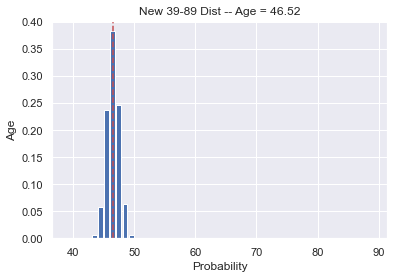

In [48]:
for i in [0,1,2,3,4,5]:
    plt.bar(bins1, distribution1[i])
    plt.axvline(x=ages1[i], ymin=0, ymax=1, c='r', ls='--')
    plt.title('Old 44-84 Dist -- Age = {:.2f}'.format(ages1[i]))
    plt.ylabel('Age')
    plt.xlabel('Probability')
    plt.show()
    
print('---')

for i in [0,1,2,3,4,5]:
    plt.bar(bins2, distribution2[i])
    plt.axvline(x=ages2[i], ymin=0, ymax=1, c='r', ls='--')
    plt.title('New 39-89 Dist -- Age = {:.2f}'.format(ages2[i]))
    plt.ylabel('Age')
    plt.xlabel('Probability')
    plt.show()

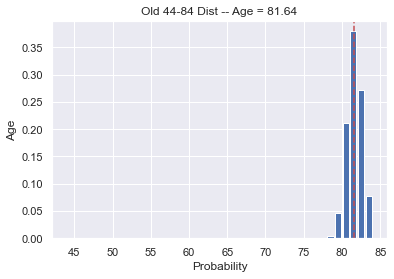

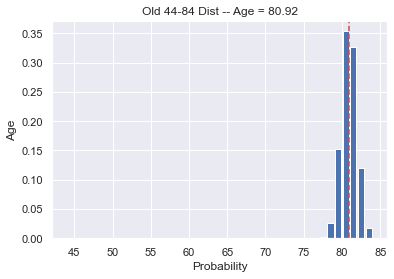

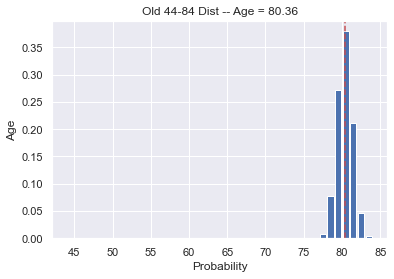

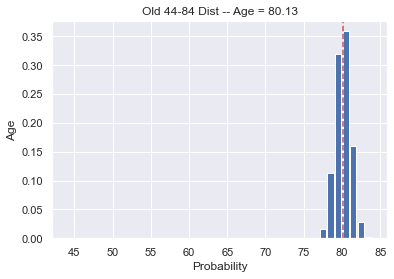

---


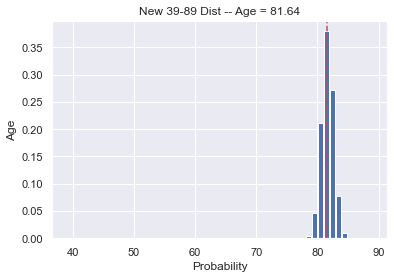

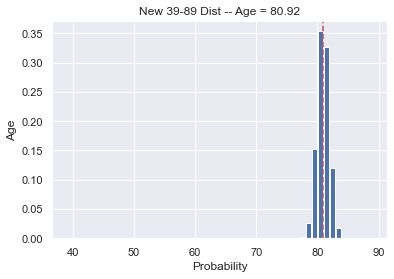

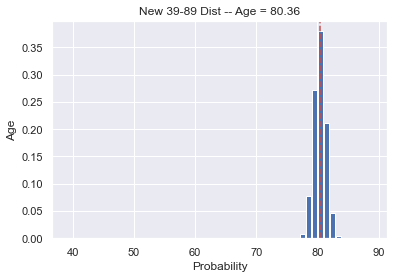

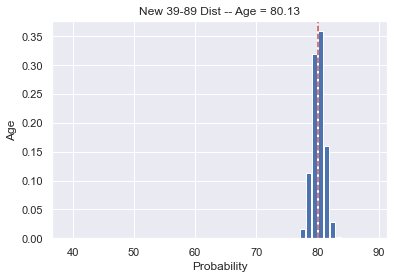

In [50]:
for i in [-1,-2,-3,-4]:
    plt.bar(bins1, distribution1[i])
    plt.axvline(x=ages1[i], ymin=0, ymax=1, c='r', ls='--')
    plt.title('Old 44-84 Dist -- Age = {:.2f}'.format(ages1[i]))
    plt.ylabel('Age')
    plt.xlabel('Probability')
    plt.show()
    
print('---')

for i in [-1,-2,-3,-4]:
    plt.bar(bins2, distribution2[i])
    plt.axvline(x=ages2[i], ymin=0, ymax=1, c='r', ls='--')
    plt.title('New 39-89 Dist -- Age = {:.2f}'.format(ages2[i]))
    plt.ylabel('Age')
    plt.xlabel('Probability')
    plt.show()

## Distributions of Several Subjects in each bin

In [56]:
age_bins = np.linspace(45,85,9)

In [58]:
print(len(age_bins[:-1]))

8


In [71]:
for idx, age in enumerate(age_bins[:-1]):
    age1 = ages1[(np.where((ages1 >= age) & (ages1 <= age_bins[idx+1] )))]
    print(age1.min(), age1.max(), len(age1))
    age2 = ages2[(np.where((ages1 >= age) & (ages1 <= age_bins[idx+1] )))]
    dist1 = distribution1[(np.where((ages1 >= age) & (ages1 <= age_bins[idx+1] )))]
    dist2 = distribution2[(np.where((ages1 >= age) & (ages1 <= age_bins[idx+1] )))]

45.12545662100456 49.97751141552499 81
50.01541095890411 54.98915525114148 404
55.00194063926938 59.999316939890605 542
60.00194063926938 64.9937214611873 679
65.00947488584484 69.98641552511413 655
70.00856164383572 74.99440639269415 508
75.01792237442919 79.74052511415516 127
80.12522831050228 81.63961187214613 4


In [224]:
np.random.seed(42)

 ========= AGE RANGE: 45.0 - 50.0 ======== 


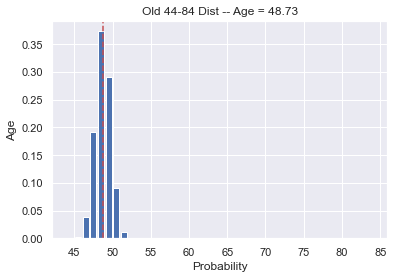

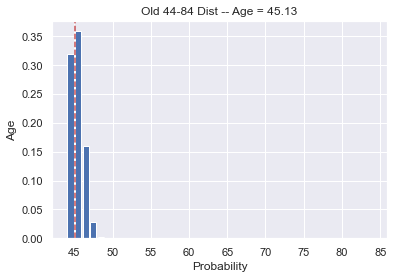

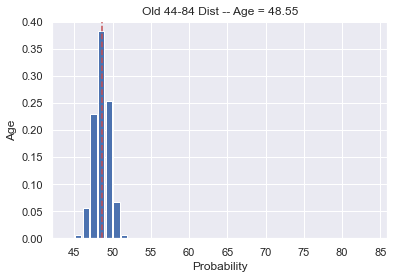

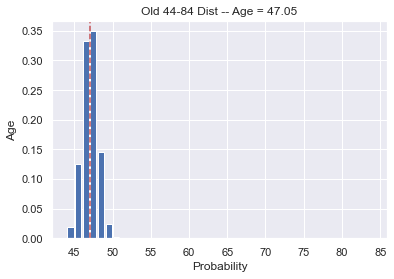

 ========= AGE RANGE: 50.0 - 55.0 ======== 


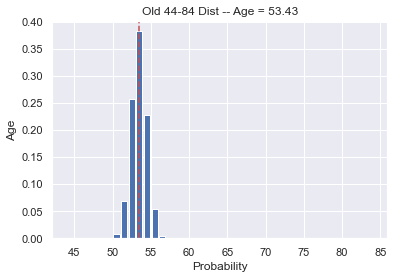

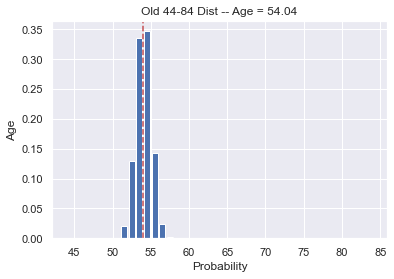

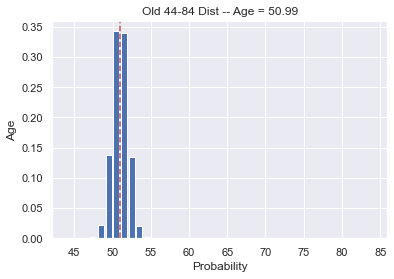

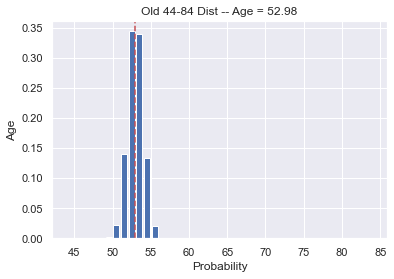

 ========= AGE RANGE: 55.0 - 60.0 ======== 


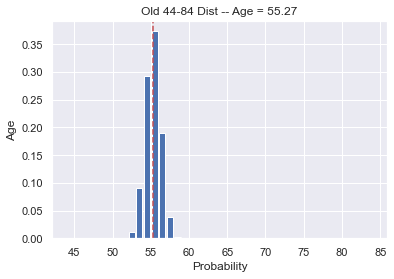

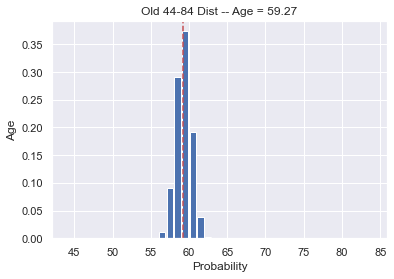

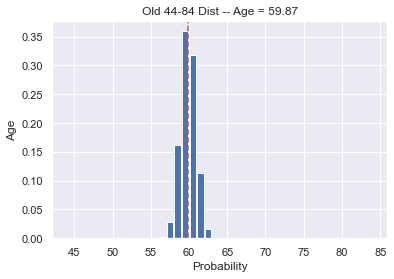

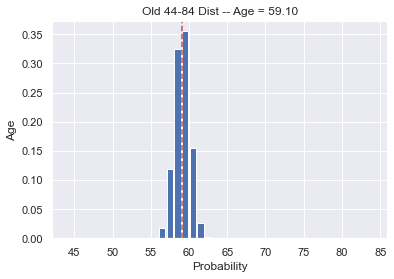

 ========= AGE RANGE: 60.0 - 65.0 ======== 


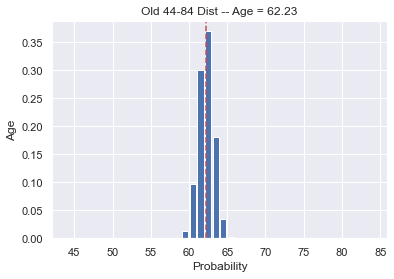

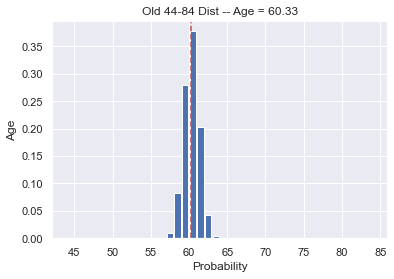

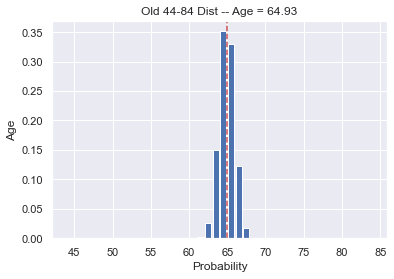

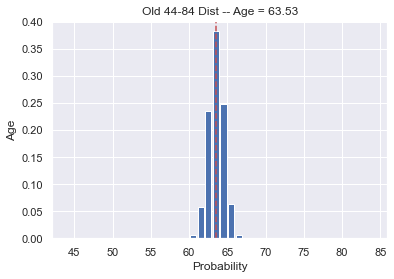

 ========= AGE RANGE: 65.0 - 70.0 ======== 


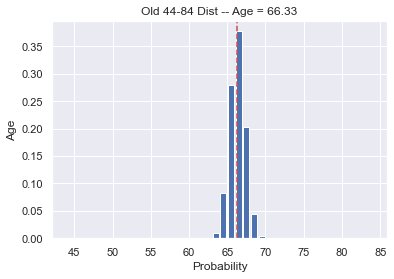

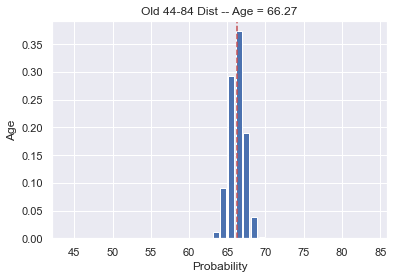

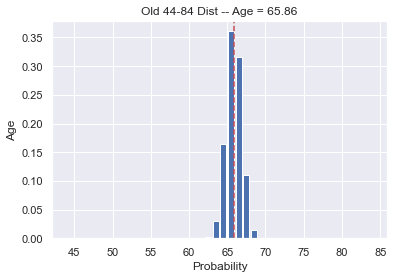

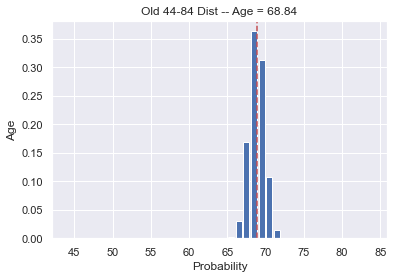

 ========= AGE RANGE: 70.0 - 75.0 ======== 


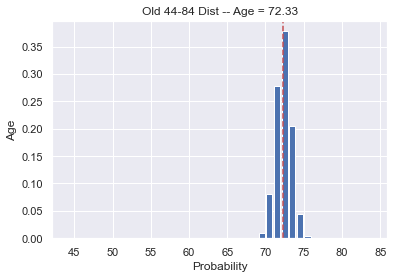

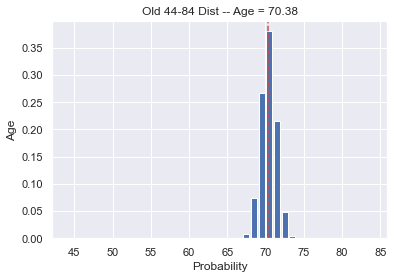

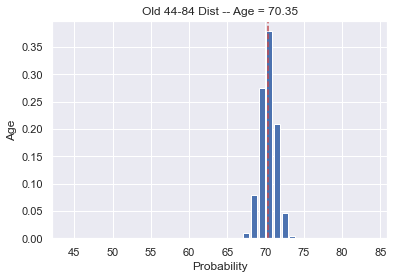

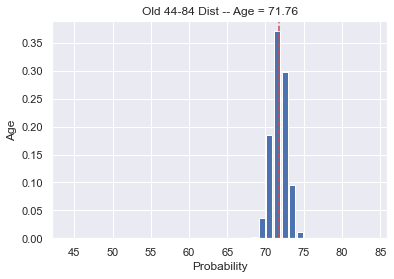

 ========= AGE RANGE: 75.0 - 80.0 ======== 


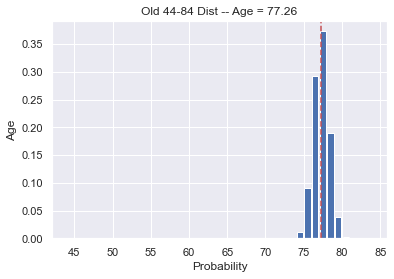

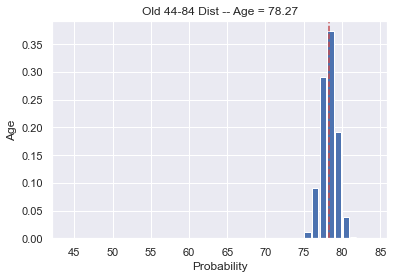

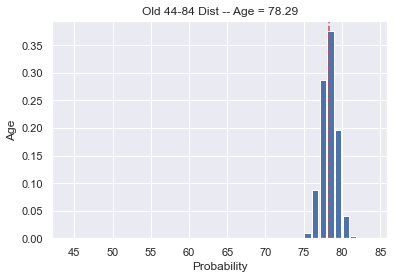

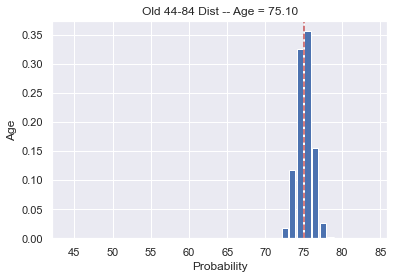

 ========= AGE RANGE: 80.0 - 85.0 ======== 


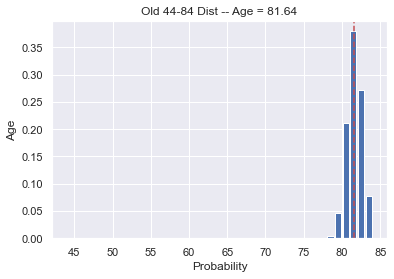

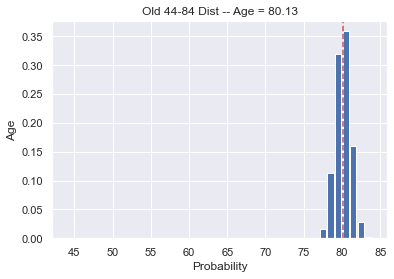

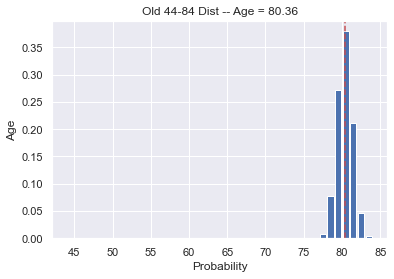

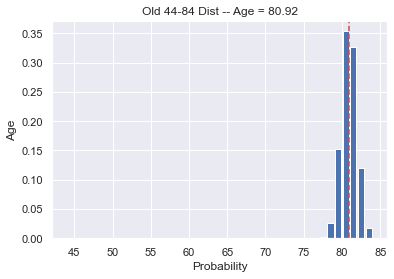

In [232]:
for idx, age in enumerate(age_bins[:-1]):
    age1 = ages1[(np.where((ages1 >= age) & (ages1 <= age_bins[idx+1] )))]
    dist1 = distribution1[(np.where((ages1 >= age) & (ages1 <= age_bins[idx+1] )))]
    
    print(" ========= AGE RANGE: {} - {} ======== ".format(age_bins[idx], age_bins[idx+1]))
    
    random_subjects = np.random.choice(age1, size=4, replace=False)
    for subj in random_subjects:
        i = np.where(age1==subj)[0][0].astype(int)
        plt.bar(bins1, dist1[i])
        plt.axvline(x=age1[i], ymin=0, ymax=1, c='r', ls='--')
        plt.title('Old 44-84 Dist -- Age = {:.2f}'.format(age1[i]))
        plt.ylabel('Age')
        plt.xlabel('Probability')
        plt.show()

 ========= AGE RANGE: 45.0 - 50.0 ======== 


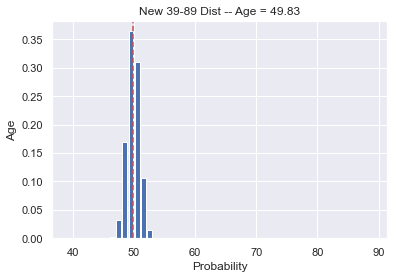

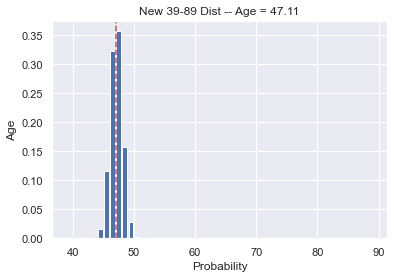

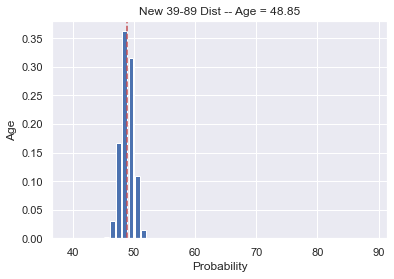

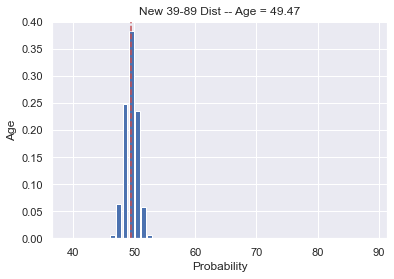

 ========= AGE RANGE: 50.0 - 55.0 ======== 


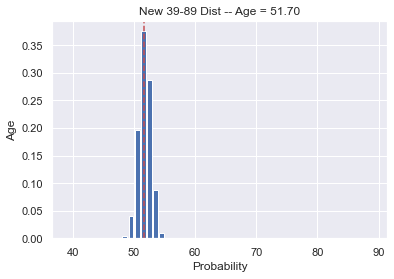

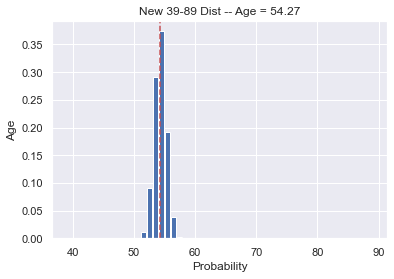

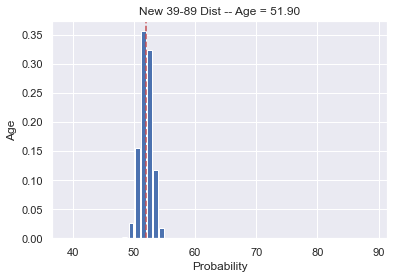

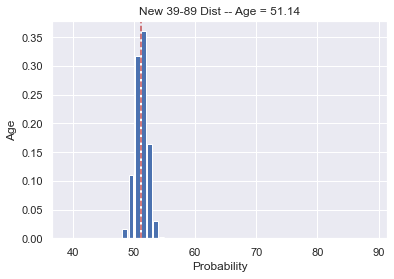

 ========= AGE RANGE: 55.0 - 60.0 ======== 


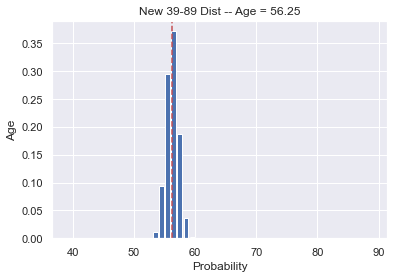

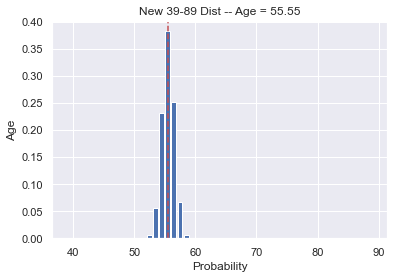

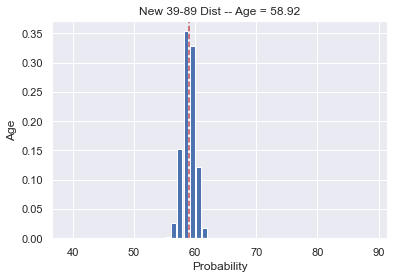

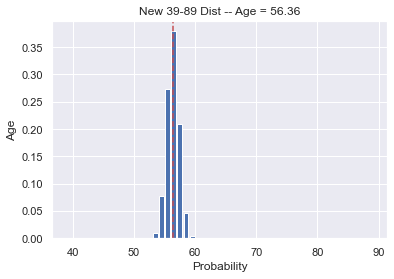

 ========= AGE RANGE: 60.0 - 65.0 ======== 


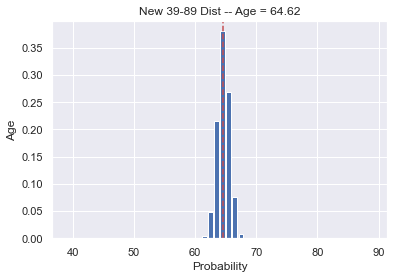

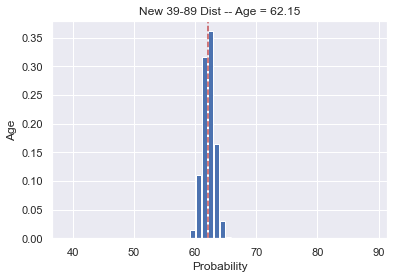

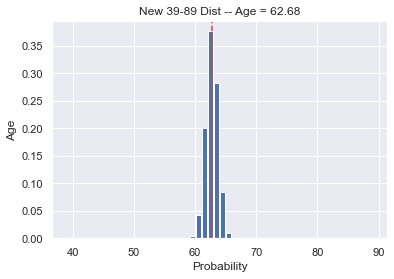

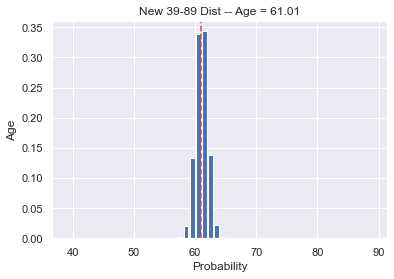

 ========= AGE RANGE: 65.0 - 70.0 ======== 


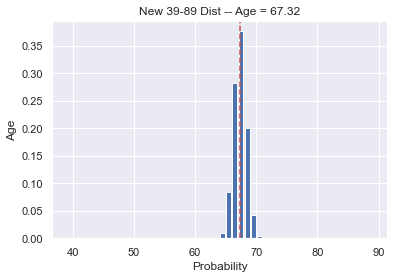

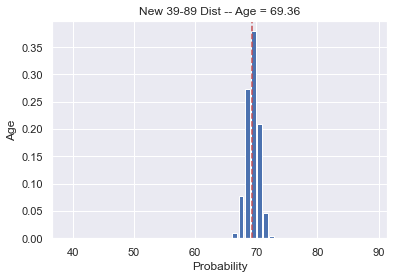

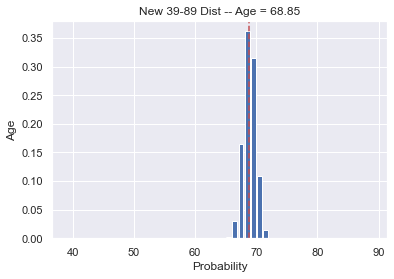

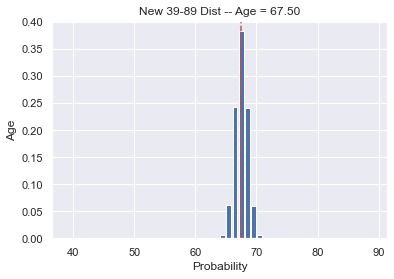

 ========= AGE RANGE: 70.0 - 75.0 ======== 


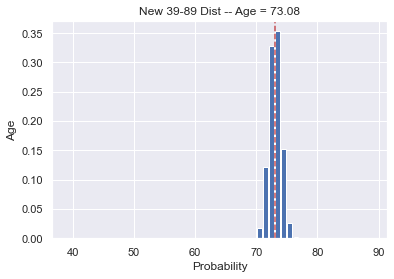

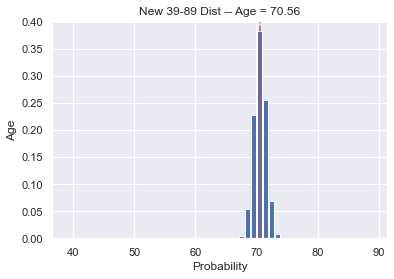

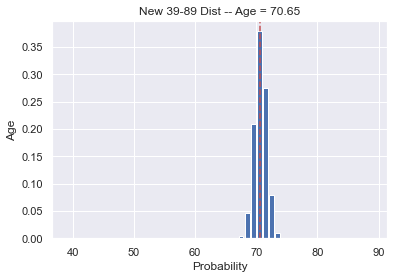

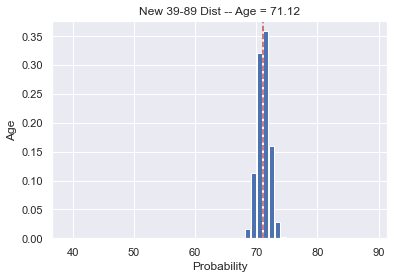

 ========= AGE RANGE: 75.0 - 80.0 ======== 


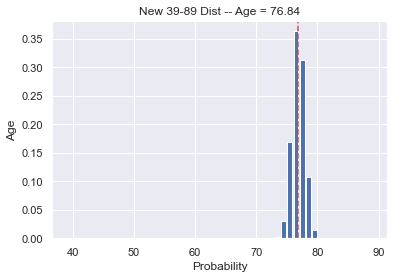

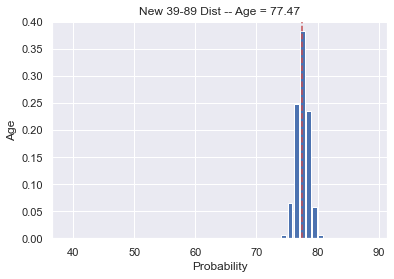

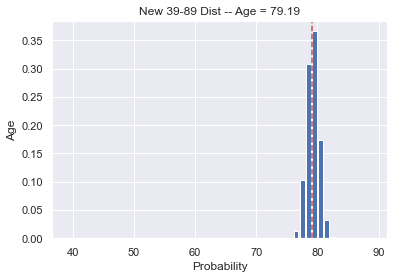

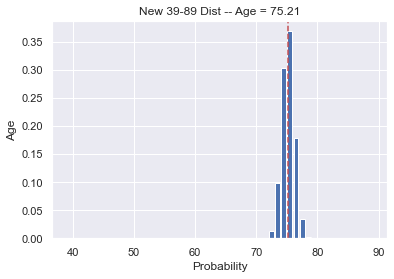

 ========= AGE RANGE: 80.0 - 85.0 ======== 


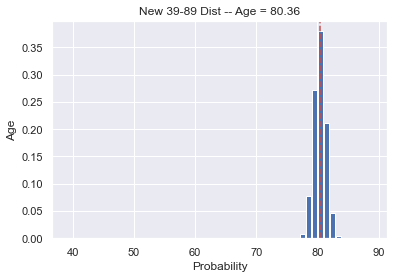

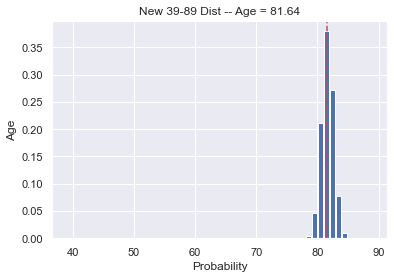

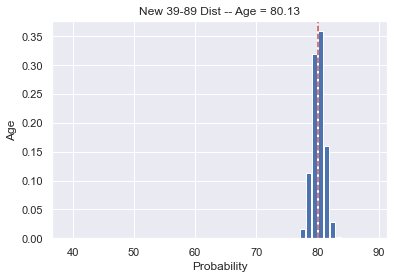

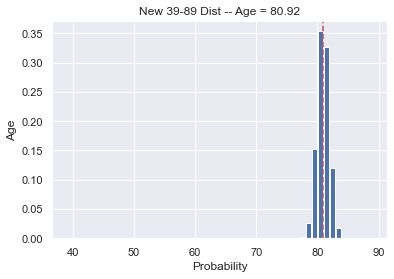

In [154]:
for idx, age in enumerate(age_bins[:-1]):
    age2 = ages2[(np.where((ages1 >= age) & (ages1 <= age_bins[idx+1] )))]
    dist2 = distribution2[(np.where((ages1 >= age) & (ages1 <= age_bins[idx+1] )))]
    
    print(" ========= AGE RANGE: {} - {} ======== ".format(age_bins[idx], age_bins[idx+1]))
    
    random_subjects = np.random.choice(age2, size=4, replace=False)
    for subj in random_subjects:
        i = np.where(age2==subj)[0][0].astype(int)
        plt.bar(bins2, dist2[i])
        plt.axvline(x=age2[i], ymin=0, ymax=1, c='r', ls='--')
        plt.title('New 39-89 Dist -- Age = {:.2f}'.format(age2[i]))
        plt.ylabel('Age')
        plt.xlabel('Probability')
        plt.show()

## Average Distributions Across Bin Ranges (every 5 years?)

In [85]:
age_bins = np.linspace(45,85,9)
print(age_bins)

[45. 50. 55. 60. 65. 70. 75. 80. 85.]


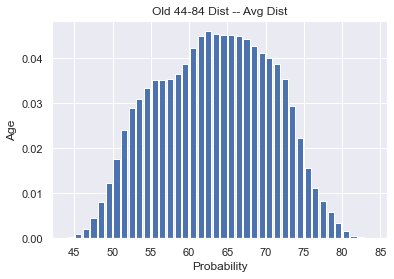

In [153]:
dist1 = distribution1.mean(axis=0)
plt.bar(bins1, dist1)
plt.title('Old 44-84 Dist -- Avg Dist')
plt.ylabel('Age')
plt.xlabel('Probability')
plt.show()

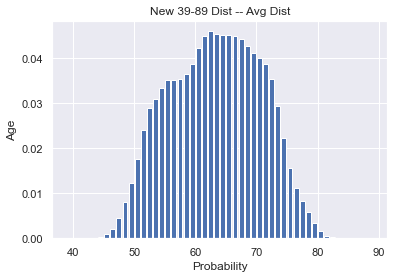

In [155]:
dist2 = distribution2.mean(axis=0)
plt.bar(bins2, dist2)
plt.title('New 39-89 Dist -- Avg Dist')
plt.ylabel('Age')
plt.xlabel('Probability')
plt.show()

<AxesSubplot:ylabel='Density'>

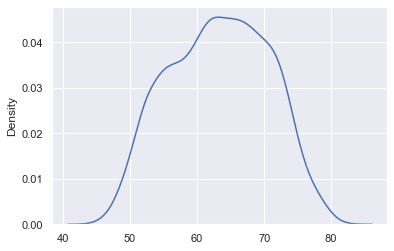

In [165]:
sns.kdeplot(ages1)

 ========= AGE RANGE: 45.0 - 50.0 ======== 


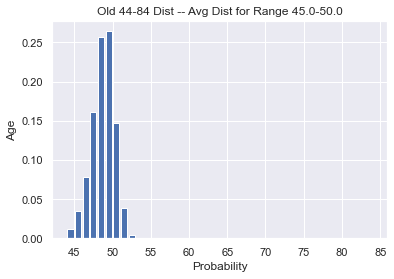

 ========= AGE RANGE: 50.0 - 55.0 ======== 


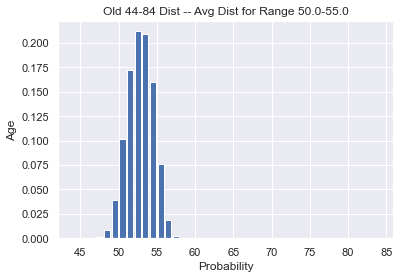

 ========= AGE RANGE: 55.0 - 60.0 ======== 


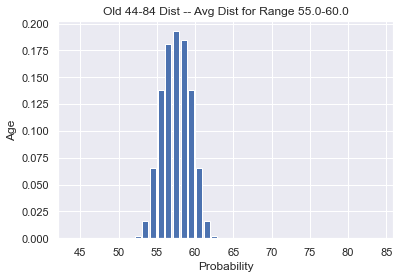

 ========= AGE RANGE: 60.0 - 65.0 ======== 


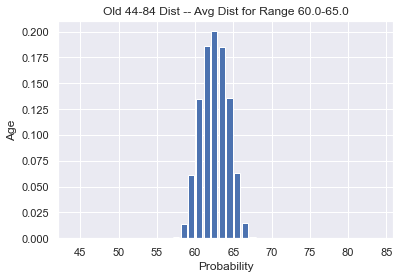

 ========= AGE RANGE: 65.0 - 70.0 ======== 


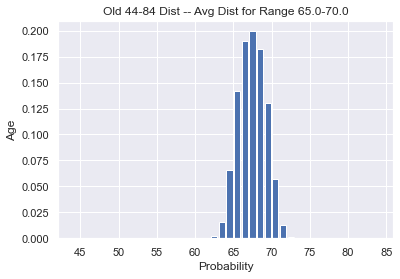

 ========= AGE RANGE: 70.0 - 75.0 ======== 


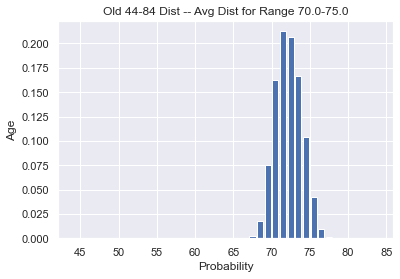

 ========= AGE RANGE: 75.0 - 80.0 ======== 


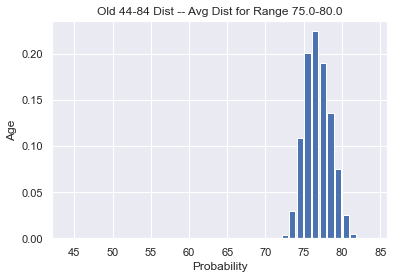

 ========= AGE RANGE: 80.0 - 85.0 ======== 


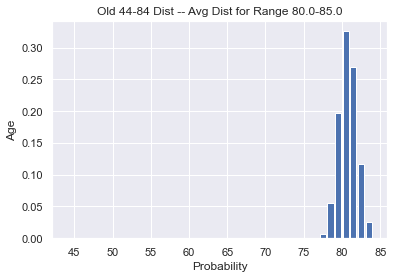

In [149]:
for idx, age in enumerate(age_bins[:-1]):
    dist1 = distribution1[(np.where((ages1 >= age) & (ages1 <= age_bins[idx+1] )))]
    
    print(" ========= AGE RANGE: {} - {} ======== ".format(age_bins[idx], age_bins[idx+1]))
    
    dist1 = dist1.mean(axis=0)
    plt.bar(bins1, dist1)
    plt.title('Old 44-84 Dist -- Avg Dist for Range {}-{}'.format(age_bins[idx], age_bins[idx+1]))
    plt.ylabel('Age')
    plt.xlabel('Probability')
    plt.show()

 ========= AGE RANGE: 45.0 - 50.0 ======== 


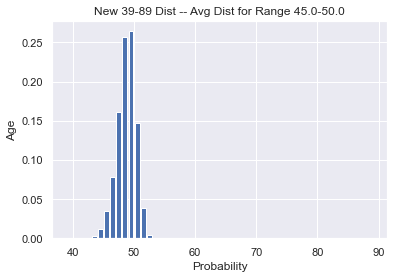

 ========= AGE RANGE: 50.0 - 55.0 ======== 


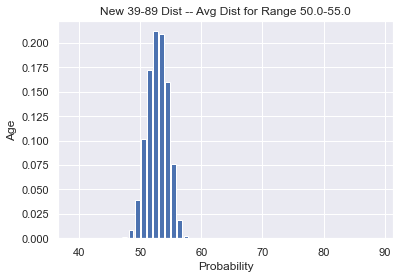

 ========= AGE RANGE: 55.0 - 60.0 ======== 


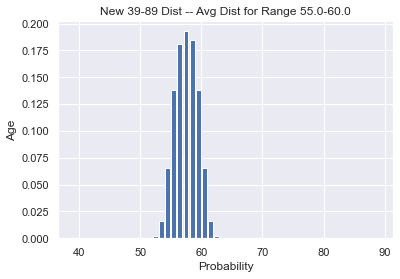

 ========= AGE RANGE: 60.0 - 65.0 ======== 


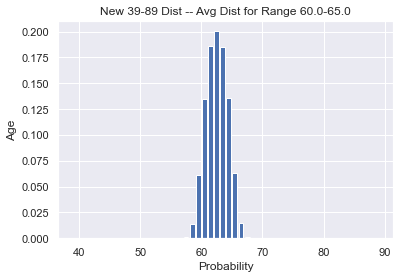

 ========= AGE RANGE: 65.0 - 70.0 ======== 


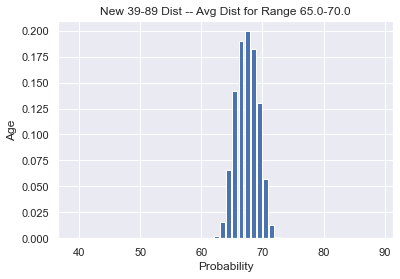

 ========= AGE RANGE: 70.0 - 75.0 ======== 


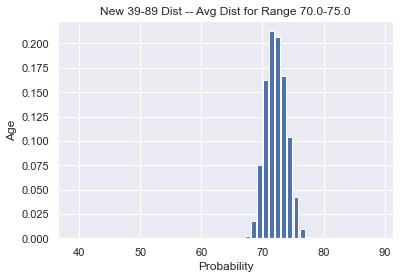

 ========= AGE RANGE: 75.0 - 80.0 ======== 


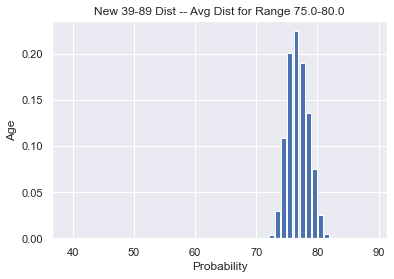

 ========= AGE RANGE: 80.0 - 85.0 ======== 


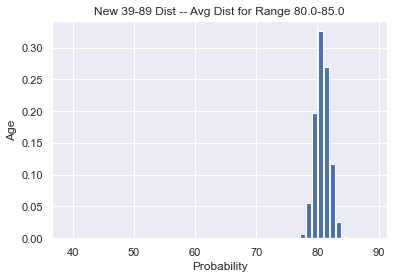

In [156]:
for idx, age in enumerate(age_bins[:-1]):
    dist2 = distribution2[(np.where((ages2 >= age) & (ages2 <= age_bins[idx+1] )))]
    
    print(" ========= AGE RANGE: {} - {} ======== ".format(age_bins[idx], age_bins[idx+1]))
    
    dist2 = dist2.mean(axis=0)
    plt.bar(bins2, dist2)
    plt.title('New 39-89 Dist -- Avg Dist for Range {}-{}'.format(age_bins[idx], age_bins[idx+1]))
    plt.ylabel('Age')
    plt.xlabel('Probability')
    plt.show()

## Distributions of subjects in the area of the peak (several subjects, maybe overlayed)

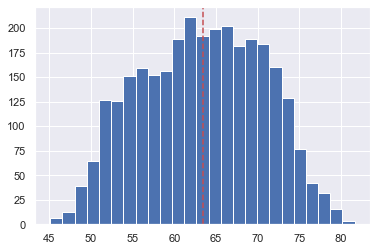

In [218]:
plt.hist(ages1, bins=25);
plt.axvline(x = ages1[1499], c='r', ls='--')

In [171]:
print(ages1.mean(), np.median(ages1))

63.272029399655665 63.41438356164383


In [175]:
ages1[1499]

63.414269406392805

In [179]:
elems = [1490, 1492, 1494, 1496, 1498, 1500, 1502, 1504, 1506, 1508]

In [180]:
len(elems)

10

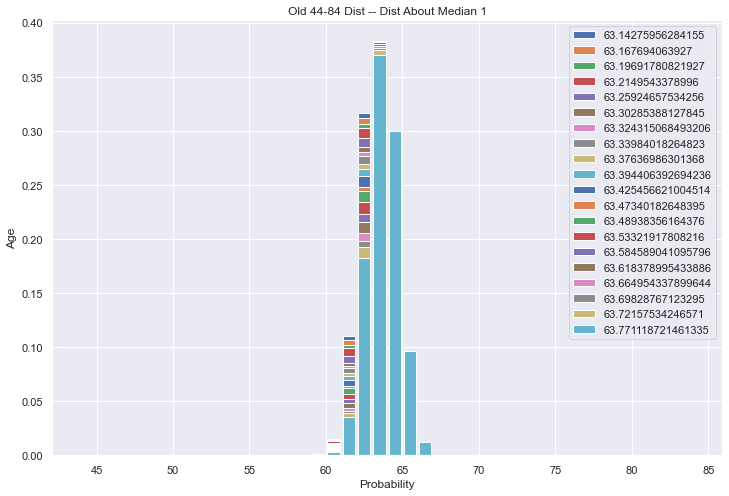

In [207]:
plt.figure(figsize=(12,8))
for elem in elems:    
    plt.bar(bins1, distribution1[elem], label=str(ages1[elem]))
#     plt.axvline(x=ages1[elem], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 44-84 Dist -- Dist About Median 1'.format(ages1[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
plt.legend()
plt.show()

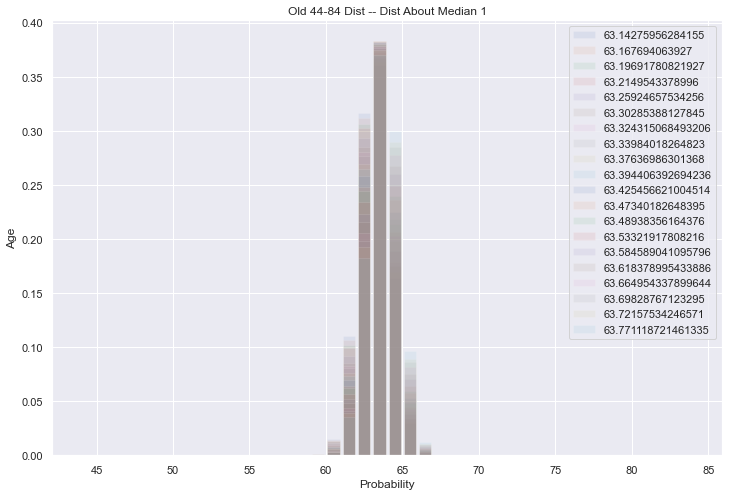

In [209]:
plt.figure(figsize=(12,8))
for elem in elems:    
    plt.bar(bins1, distribution1[elem], label=str(ages1[elem]), alpha=0.1)
#     plt.axvline(x=ages1[elem], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 44-84 Dist -- Dist About Median 1'.format(ages1[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
plt.legend()
plt.show()

[1489 1491 1493 1495 1497 1500 1502 1504 1506 1509]
[63.34851598 63.35742009 63.37636986 63.39417808 63.40947489 63.41449772
 63.43892694 63.46586758 63.47545662 63.48938356]


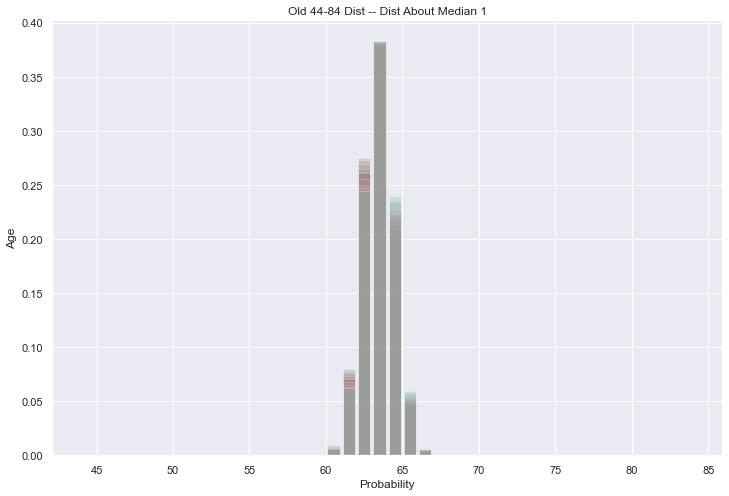

In [202]:
lims = 10
steps = 10
elems = np.linspace(1499-lims, 1499+lims, steps).astype(int)
print(elems)
print(ages1[elems])
plt.figure(figsize=(12,8))
for elem in elems:    
    plt.bar(bins1, distribution1[elem], label=str(ages1[elem]), alpha=0.25)
#     plt.axvline(x=ages1[elem], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 44-84 Dist -- Dist About Median 1'.format(ages1[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
# plt.legend()
plt.show()

[1479 1481 1483 1485 1487 1489 1491 1493 1495 1497 1500 1502 1504 1506
 1508 1510 1512 1514 1516 1519]
[63.29737443 63.30308219 63.31079235 63.32445355 63.33481735 63.34851598
 63.35742009 63.37636986 63.39417808 63.40947489 63.41449772 63.43892694
 63.46586758 63.47545662 63.48481735 63.51655251 63.52659817 63.53869863
 63.57035519 63.59189498]


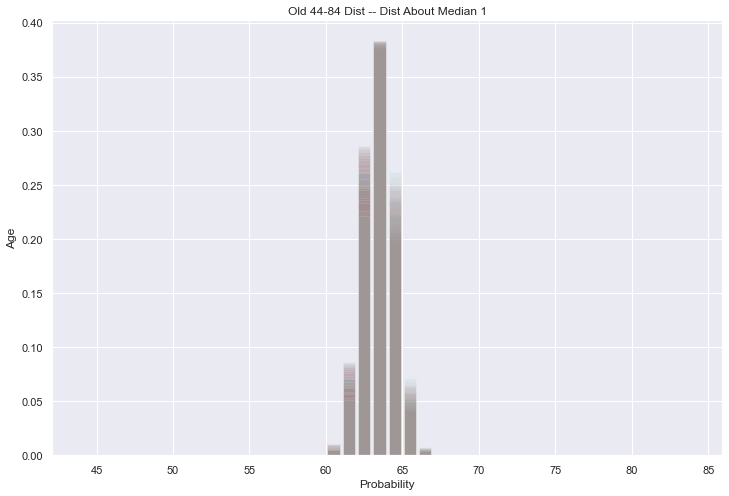

In [203]:
lims = 20
steps = 20
elems = np.linspace(1499-lims, 1499+lims, steps).astype(int)
print(elems)
print(ages1[elems])
plt.figure(figsize=(12,8))
for elem in elems:    
    plt.bar(bins1, distribution1[elem], label=str(ages1[elem]), alpha=0.1)
#     plt.axvline(x=ages1[elem], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 44-84 Dist -- Dist About Median 1'.format(ages1[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
# plt.legend()
plt.show()

[1469 1472 1475 1478 1481 1484 1487 1491 1494 1497 1500 1503 1506 1510
 1513 1516 1519 1522 1525 1529]
[63.20057078 63.22751142 63.25924658 63.27636986 63.30308219 63.32431507
 63.33481735 63.35742009 63.38002283 63.40947489 63.41449772 63.44714612
 63.47545662 63.51655251 63.53321918 63.57035519 63.59189498 63.618379
 63.6576484  63.69554795]


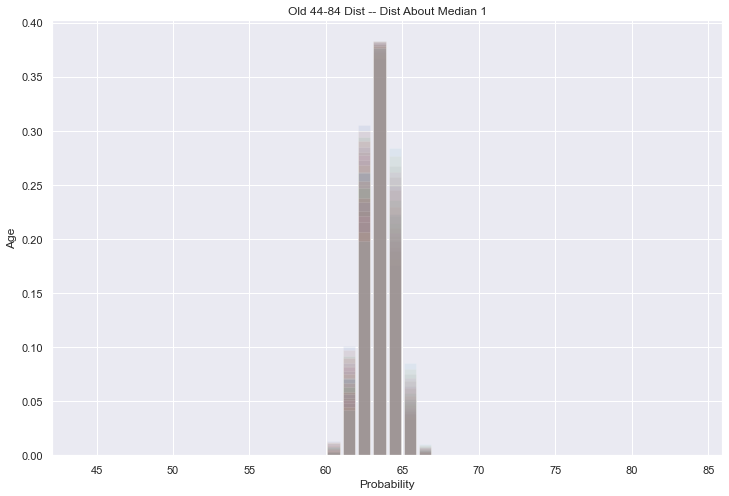

In [204]:
lims = 30
steps = 20
elems = np.linspace(1499-lims, 1499+lims, steps).astype(int)
print(elems)
print(ages1[elems])
plt.figure(figsize=(12,8))
for elem in elems:    
    plt.bar(bins1, distribution1[elem], label=str(ages1[elem]), alpha=0.1)
#     plt.axvline(x=ages1[elem], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 44-84 Dist -- Dist About Median 1'.format(ages1[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
# plt.legend()
plt.show()

[1459 1463 1467 1471 1475 1480 1484 1488 1492 1496 1501 1505 1509 1513
 1517 1522 1526 1530 1534 1539]
[63.14275956 63.16769406 63.19691781 63.21495434 63.25924658 63.30285388
 63.32431507 63.33984018 63.37636986 63.39440639 63.42545662 63.47340183
 63.48938356 63.53321918 63.58458904 63.618379   63.66495434 63.69828767
 63.72157534 63.77111872]


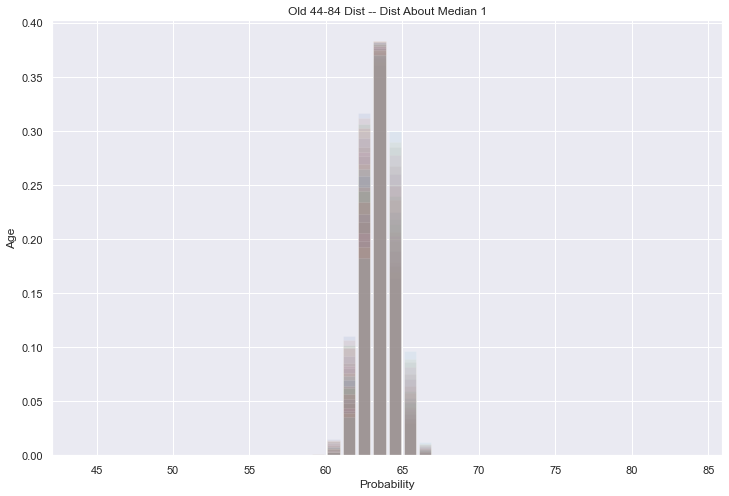

In [205]:
lims = 40
steps = 20
elems = np.linspace(1499-lims, 1499+lims, steps).astype(int)
print(elems)
print(ages1[elems])
plt.figure(figsize=(12,8))
for elem in elems:    
    plt.bar(bins1, distribution1[elem], label=str(ages1[elem]), alpha=0.1)
#     plt.axvline(x=ages1[elem], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 44-84 Dist -- Dist About Median 1'.format(ages1[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
# plt.legend()
plt.show()

[1399 1409 1420 1430 1441 1451 1462 1472 1483 1493 1504 1514 1525 1535
 1546 1556 1567 1577 1588 1599]
[62.69877049 62.80833333 62.87909836 62.96815068 63.04394977 63.09372146
 63.15627854 63.22751142 63.31079235 63.37636986 63.46586758 63.53869863
 63.6576484  63.72340183 63.82888128 63.93116438 63.99509132 64.06061644
 64.16152968 64.25856164]


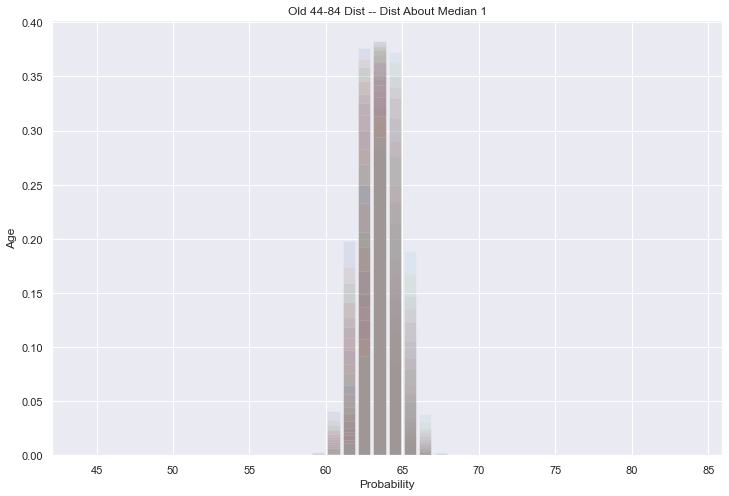

In [212]:
lims = 100
steps = 20
elems = np.linspace(1499-lims, 1499+lims, steps).astype(int)
print(elems)
print(ages1[elems])
plt.figure(figsize=(12,8))
for elem in elems:    
    plt.bar(bins1, distribution1[elem], label=str(ages1[elem]), alpha=0.1)
#     plt.axvline(x=ages1[elem], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 44-84 Dist -- Dist About Median 1'.format(ages1[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
# plt.legend()
plt.show()

[1299 1320 1341 1362 1383 1404 1425 1446 1467 1488 1509 1530 1551 1572
 1593 1614 1635 1656 1677 1699]
[62.03641553 62.20034247 62.34851598 62.45787671 62.58892694 62.75399543
 62.91312785 63.06061644 63.19691781 63.33984018 63.48938356 63.69828767
 63.88116438 64.03299087 64.22317352 64.38230594 64.47477169 64.60650685
 64.77659817 64.9533105 ]


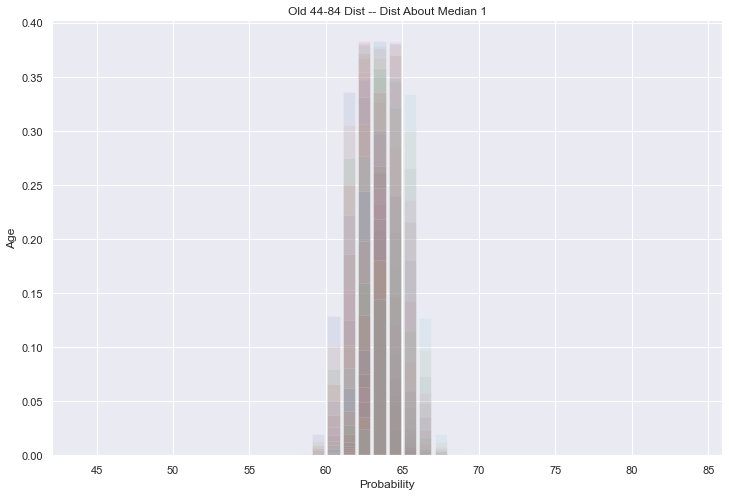

In [233]:
lims = 200
steps = 20
elems = np.linspace(1499-lims, 1499+lims, steps).astype(int)
print(elems)
print(ages1[elems])
plt.figure(figsize=(12,8))
for elem in elems:    
    plt.bar(bins1, distribution1[elem], label=str(ages1[elem]), alpha=0.1)
#     plt.axvline(x=ages1[elem], ymin=0, ymax=1, c='r', ls='--')
plt.title('Old 44-84 Dist -- Dist About Median 1'.format(ages1[i]))
plt.ylabel('Age')
plt.xlabel('Probability')
# plt.legend()
plt.show()